<a href="https://colab.research.google.com/github/goulartsursula/iniciacao-cientifica/blob/master/notebooks/creating_sound_from_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython import display

%matplotlib inline

muons = pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/Dimuon_DoubleMu.csv')

muons.head()


,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,-1,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,-1,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,-1,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


In [32]:
#creating sound

lngth = 100; base_freq = 220; rate = 44100
ts = np.arange(0, lngth, step = lngth/2/rate)
sweep = np.sqrt((lngth-ts)) * (np.sin(base_freq*ts**2) + np.sin(base_freq*np.power(2, 5/12)*ts**2))
display.Audio(sweep, rate=rate/5)

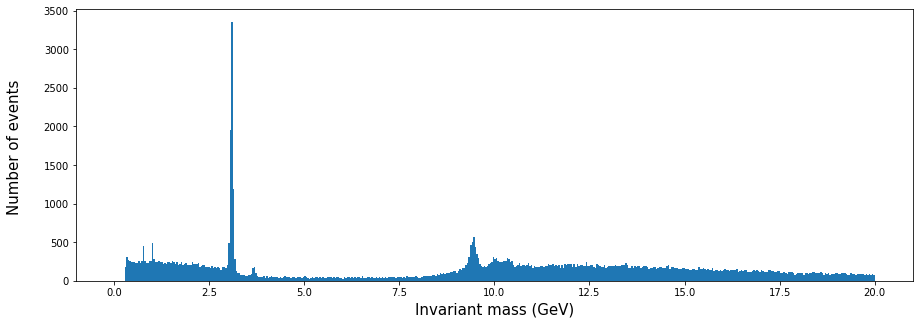

In [90]:
# check if our data is a wave

plt.figure(figsize = (15,5))
plt.hist(muons.M, bins = 500, range=(0,20))
plt.xlabel('Invariant mass (GeV)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.show()

In [86]:
cut = muons.M
lngth = len(cut); base_freq = 440; rate = 44100/2

hist, edges = np.histogram(cut, bins = 500)

a = []

for x in range(0, len(hist)):
  b = hist[x]*np.ones(hist[x])
  a = np.append(a,b)

ts = cut.sort_values()
sweep = a * np.sin(base_freq*ts**2)
display.Audio(sweep, rate=rate)

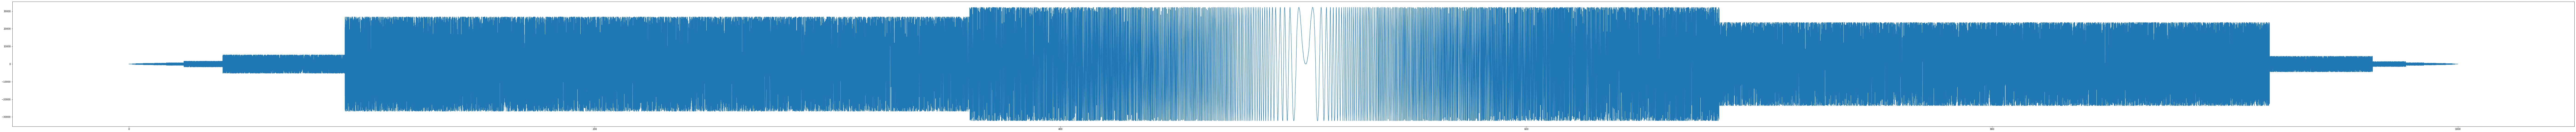

In [87]:
plt.figure(figsize = (200,10)) 
x = np.linspace(0, 1000, len(cut))
plt.plot(x,sweep)
plt.show()